# Hyperparameters tuning process
- alpha, beta (momentum), beta1, beta2, epsilon, # layers, # hidden units, learning rate decay, mini-batch size
- Most important are alpha, then minibatch size, beat (0.9) and number of hidden units
- Next important are number of layers, learning rate decay
- beta1 can always be 0.9, beta2 can be 0.999 and epsilon can be 10^-8
- if tuning, sample the points in a grid and systematically explore all combinations of two hyperparameters
- in deep learning, choose random set of hyperparameter values
- if hyperparameter1 is alpha and epsilon is 2, if you sample in the grid, if random, can try more distinct values of alpha
- can also sample in 3D cube. 
-find that some worked better, zoom into that region of the random points, take a smaller square, courser finer search
- Takeaway, pick random sampling

# Using an appropriate scale to pick hyperparameters
- if trying to pick number of hidded units in layer l, maybe 50-100
- or if number of layers: 2-4
- BUT NOT FOR aLL
- for alpha, could be ,0001 to 1, need to search on a log scale and do uniformly at random, to get order of magnitude changes
- let r = -4 *np.random.rand() will be between (-4,0)
- alpha = 10^r
- hyperparemeters for exponentially weighted averages
- beta = 0.9 to 0.999, explore values for 1- beta so then look at 0.2 to 0.001 and then can do log sampling again, if beta is close to 1 requires more sampling close to beta

# Hyperparameters tuning in practice: Pandas vs Caviar
- NLP, vision, and speech
- babysitting on model - panda
- train many models in parallel caviar

# Batch Normalization, activations in a network
- normalizing the inputs to speed up learning, rather than elongated, makes the input values more round
- now have x and activations, how to train if you want to also normalize the activations
- can we normalize a so to train w, and b faster
- normalize not a, but z, in practice z is done much more 
- implementing batch norm
- given some intermediate values in neural net, z1 to zm
- $$ \mu = \frac{1}{m} \sum_{i=1}z^{(i)} $$
- $$ \sigma = \frac{1}{m} \sum_{i=1}(z^{(i)} - \mu)^{2} $$
- $$ z^{(i)}_{norm} = \frac{z^{(i)} - \mu}{\sqrt{\sigma^{2} + \epsilon}} $$
- where epsilon is tiny adjustment just in case the variance is zero
- will always have mu 0 and variance 1
- however, if you don't want hidden units to always have mu 0 and vairance 1
- $$ \tilde{z^{(i)}} = \gamma z^{(i)}_{norm} + \beta $$ where gamma and beta are learned
- now use ztildai instead of zi in your network
- don't always want hidden layer to have maen 0 and variance 1, ensures that hidden unit have standarized mea and variance, controlled by two parameters, have fixed mean and variance



# Fitting Batch Norm into a neural network
- taje z1 normalize and obtain activation one. Then compute z2 and but it through batch normalization
- adding beta1 and gamma1 to each layer, nothing to do with the hyperparameter
- in tensor flow can implement batch norm yourself
- usually apply with mini batches
-take your first minibatch and get z1 and then do batch norm, and then get z tilda
- there is no need for b, because you will be normalizing


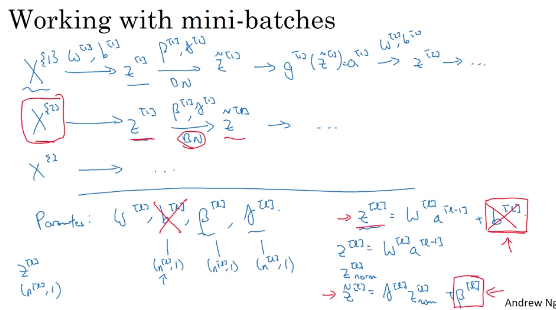

In [2]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2018-01-25 at 10.49.15 AM.png')

- to implement gradient descent
- for t = 1 .... num mini batches
    compute forward prop on X^{t}
        in each hidden layer, use BN to normalize z ^[l] with ztilda^[l]
      use back prob to compute all the gradients
      update the parameters w, beta, and gamma
      Works with momentum, RMSprop, Adam
      
      

# Why does Batch Norm work?
- input features x normalization can speed up learning
- batch norm, trained images on black cats, now have color sets
- covariate shift, if x changes, may need to relearn algorithm
- prevents hidden unit values from shifting around too much
- each mini batch is scaled by mean/variance computed on just mini batch
- this adds some noise to values within that minibatch
- batch norm has a slight regularization effect, doesn't make other downstream layers dependent on rprevious layer
- larger minibatch size, reduce regularization effect
-use way to normalize units and speed up learning, regularization is unintended side effect

# Batch Norm at Test time
- Have equations for batch norm
- compute variance, z norm, and z tilda, rescale by gamma and beta
- come up with estimate mu and sima squared using exponentially weighted average across the mini batches
- calculate mu and sigma square for each minibatch and compute an exponentially weighted average
- when test time, compute the znorm with the exponentially weighted average
- use a running average, and use those at test time
